### Speed Dating Experiment

##### By Grace Cho & Eddy Widerker 

### Project Design Write-Up

##### Background + Dataset Introduction

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper [Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment](http://faculty.chicagobooth.edu/emir.kamenica/documents/genderDifferences.pdf) and details are as follows:

* Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. 

* The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. 

##### Project Problem + Hypothesis

In this project, we will aim to explore which of the six attributes (Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests) are most important to getting a positive response from their speed dating partners. 

* A hypothesis is that those who score high on the 'Attractiveness' attribute would be more likely to be chosen for future dates.

Some of the other data exploration ideas are as follows:

* What are the least/most desirable attributes in a male partner? Does this differ for female partners?
* Are shared interests more important than a shared racial background?

##### Project Concerns

Following are some questions I have about the project / dataset:

* How can I choose from the variables available?
* How do each of the variables relate to one another?
* How can I better understand the data dictionary available / what type of data is each variable (categorical v. numerical)?
* Which model is most applicable to this question?

Some of the risks to the project are as follows:

* If the model is wrong, those who read the findings may have inaccurate knowledge of attributes that influence getting a positive response from dates.
* Data is gathered from sample of population and is not representative of general population.

#####  Outcomes

The output would be a combination of exploratory data analysis followed by building of model to explain which of the 6 attributes is most important to getting a positive rate from the speed dating partners. There would be easy - to - follow visuals as well as descriptions of each step of analysis for the audience.

The model does not have to be complicated, if the goal remains that I want to simply identify which of the 6 attributes are important for success in speed dating. The project will be considered a success if I can achive this aim, and if it fails I would continue the analysis from a different angle or apply a different model for analysis.

In [1]:
# imports

from scipy.stats import norm
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in Data
speed_dating_data = pd.read_csv('Speed Dating Data.csv')

# Sets df to view all 195 columns of the data set
pd.set_option('display.max_columns', 200)

sddf = speed_dating_data.copy()
sddf.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
sddf.shape

(8378, 195)

#### Data mapping for categorial variables

In [68]:
# convert number values for gender, race, race_o (aka race of partner) to text values
#sddf['gender'] = sddf.gender.apply(lambda x: "female" if x==0 else "male")

#race_map = {1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", \
#            4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"}

#sddf['race'] = sddf.race.map(race_map)
#sddf['race_o'] = sddf.race.map(race_map)

In [4]:
sddf.shar1_1.describe()

count    8257.000000
mean       11.845111
std         6.362154
min         0.000000
25%         9.520000
50%        10.640000
75%        16.000000
max        30.000000
Name: shar1_1, dtype: float64

Average Dates Per Male: 15.1407942238
Average Dates per Female: 15.2700729927
Avg. Male Match Percentage: 20.2888324872
Avg. Feale Match Percentage: 20.9103753144


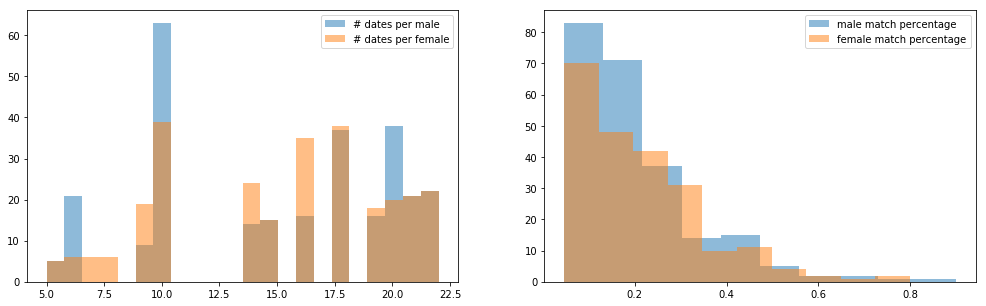

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(17,5))

# The number of dates per person
num_dates_per_male = sddf[sddf.gender == 1].groupby('iid').apply(len)
num_dates_per_female = sddf[sddf.gender == 0].groupby('iid').apply(len)
axes[0].hist(num_dates_per_male, bins=22, alpha=0.5, label='# dates per male')
axes[0].hist(num_dates_per_female, bins=22, alpha=0.5, label='# dates per female')
# axes[0].suptitle('Number of dates per male/female')
axes[0].legend(loc='upper right')


# The number of matches per person
matches = sddf[sddf.match == 1]
matches_male = matches[matches.gender == 1].groupby('iid').apply(len)
matches_female = matches[matches.gender == 0].groupby('iid').apply(len)
axes[1].hist((matches_male / num_dates_per_male).dropna(), alpha=0.5, label='male match percentage')
axes[1].hist((matches_female / num_dates_per_female).dropna(), alpha=0.5, label='female match percentage')
axes[1].legend(loc='upper right')
#axes[1].suptitle('Matches per person by gender')


print "Average Dates Per Male: " + str(num_dates_per_male.mean())
print "Average Dates per Female: " + str(num_dates_per_female.mean())
print "Avg. Male Match Percentage: " + str((matches_male / num_dates_per_male).mean() * 100.0)
print "Avg. Feale Match Percentage: " + str((matches_female / num_dates_per_female).mean() * 100.0)

#### Removing NaNs

In [6]:
# remove NaNs from age

#sddf = sddf[sddf.age.notnull()].copy()
#len(sddf) - len(sddf['match'].dropna())

In [7]:
# mean imputation for attributes

list_meanimpu = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'shar1_1', 'amb1_1', \
                 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'shar2_1', 'amb2_1', \
                'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
 

for x in list_meanimpu:
    sddf[x] = sddf[x].fillna(method = 'ffill')

In [8]:
list_dropna = list_meanimpu + ['gender', 'race', 'age', 'samerace', 'imprace', 'imprelig', 'match', 'int_corr', \
                              'sports', 'tvsports', 'concerts', 'clubbing', 'yoga', \
                              'music', 'exphappy', 'expnum', 'shopping', \
                              'theater', 'reading', 'art', 'hiking', 'museums', \
                              'dining', 'exercise', 'career_c', 'goal', \
                              'field_cd']

df_nonull = sddf[list_dropna].dropna()

print df_nonull.isnull().sum()

attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
shar1_1     0
amb1_1      0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
shar2_1     0
amb2_1      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
gender      0
race        0
age         0
samerace    0
imprace     0
imprelig    0
match       0
int_corr    0
sports      0
tvsports    0
concerts    0
clubbing    0
yoga        0
music       0
exphappy    0
expnum      0
shopping    0
theater     0
reading     0
art         0
hiking      0
museums     0
dining      0
exercise    0
career_c    0
goal        0
field_cd    0
dtype: int64


In [9]:
df_nonull.head(10)

,attr1_1,sinc1_1,intel1_1,fun1_1,shar1_1,amb1_1,attr2_1,sinc2_1,intel2_1,fun2_1,shar2_1,amb2_1,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,gender,race,age,samerace,imprace,imprelig,match,int_corr,sports,tvsports,concerts,clubbing,yoga,music,exphappy,expnum,shopping,theater,reading,art,hiking,museums,dining,exercise,career_c,goal,field_cd
30,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,35.00,20.00,20.00,20.00,0.00,5.00,0,2.0,23.0,1,1.0,1.0,0,-0.18,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
31,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,60.00,0.00,0.00,40.00,0.00,0.00,0,2.0,23.0,1,1.0,1.0,0,-0.18,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
32,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,19.00,18.00,19.00,18.00,14.00,12.00,0,2.0,23.0,0,1.0,1.0,0,0.05,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
33,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,30.00,5.00,15.00,40.00,5.00,5.00,0,2.0,23.0,1,1.0,1.0,1,-0.18,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
34,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,30.00,10.00,20.00,10.00,10.00,20.00,0,2.0,23.0,0,1.0,1.0,0,0.21,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
35,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,50.00,0.00,30.00,10.00,0.00,10.00,0,2.0,23.0,1,1.0,1.0,0,0.37,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
36,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,35.00,15.00,25.00,10.00,5.00,10.00,0,2.0,23.0,1,1.0,1.0,0,0.35,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
37,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,33.33,11.11,11.11,11.11,11.11,22.22,0,2.0,23.0,1,1.0,1.0,0,0.15,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
38,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,50.00,0.00,25.00,10.00,0.00,15.00,0,2.0,23.0,1,1.0,1.0,1,-0.47,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0
39,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,100.00,0.00,0.00,0.00,0.00,0.00,0,2.0,23.0,1,1.0,1.0,0,-0.19,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0


## Time 1 Analysis - participant reponses prior to speed dating event

In [11]:
# Demographics - gender, race, age, samerace, imprace, imprelig

demo = ['gender', 'race', 'age', 'samerace', 'imprace', 'imprelig', 'match']
df_demo = sddf[demo]
print df_demo.head()

   gender  race   age  samerace  imprace  imprelig  match
0       0   4.0  21.0         0      2.0       4.0      0
1       0   4.0  21.0         0      2.0       4.0      0
2       0   4.0  21.0         1      2.0       4.0      1
3       0   4.0  21.0         0      2.0       4.0      1
4       0   4.0  21.0         0      2.0       4.0      1


### EDA of df_demo

In [19]:
pd.value_counts(df_demo.match)

0    6998
1    1380
Name: match, dtype: int64

[<matplotlib.text.Text at 0x11cce22d0>, <matplotlib.text.Text at 0x11c9a4190>]

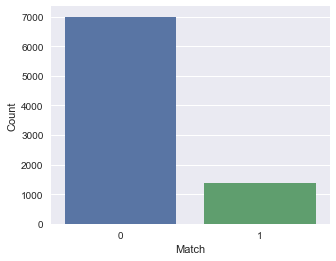

In [20]:
# match
sns.set(rc={"figure.figsize": (5,4)})
g= sns.barplot(x=df_demo.match.value_counts().index, \
           y = df_demo.match.value_counts(), data = df_demo, ci = None)

g.set(xlabel='Match', ylabel='Count')

In [12]:
# match vs. race
pd.crosstab(index=df_demo['match'], columns = df_demo['samerace'], margins = True, normalize = 'all')

samerace,0,1,All
match,,,
0,0.507042,0.328241,0.835283
1,0.097159,0.067558,0.164717
All,0.604201,0.395799,1.000000


In [13]:
# match vs. imprace - scale from 1 to 10
pd.crosstab(index=df_demo['match'], columns = df_demo['imprace'], margins = True)

imprace,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
match,,,,,,,,,,,,
0,7,2280,795,812,424,557,443,469,597,331,219,6934
1,1,518,159,171,86,100,81,74,66,78,31,1365
All,8,2798,954,983,510,657,524,543,663,409,250,8299


In [14]:
# match vs. imprelig - scale from 1 to 10
pd.crosstab(index=df_demo['match'], columns = df_demo['imprelig'], margins = True)

imprelig,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
match,,,,,,,,,,,
0,2495,735,771,426,603,553,398,417,252,284,6934
1,537,128,158,98,94,108,69,100,30,43,1365
All,3032,863,929,524,697,661,467,517,282,327,8299


[<matplotlib.text.Text at 0x11cf57a90>, <matplotlib.text.Text at 0x11ce9ac50>]

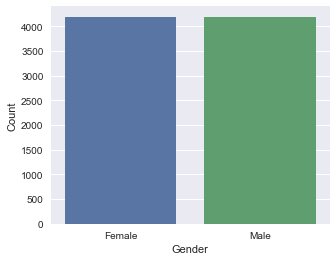

In [22]:
# gender
sns.set(rc={"figure.figsize": (5,4)})
g= sns.barplot(x=df_demo.gender.value_counts().index, \
           y = df_demo.gender.value_counts(), data = df_demo, ci = None)

g.set_xticklabels(["Female", "Male"])
g.set(xlabel='Gender', ylabel='Count')

[<matplotlib.text.Text at 0x123908490>, <matplotlib.text.Text at 0x1238ead50>]

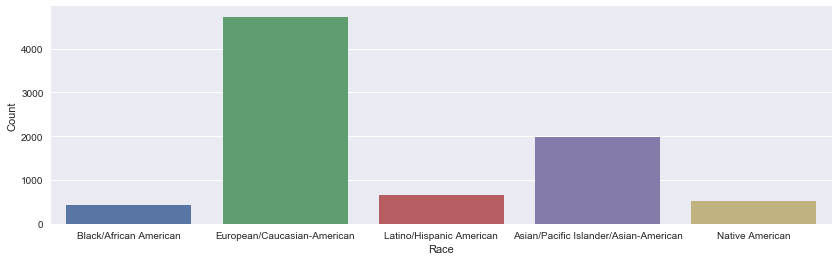

In [79]:
# race
sns.set(rc={"figure.figsize": (14,4)})
g = sns.barplot(x=df_demo.race.value_counts().index, \
           y = df_demo.race.value_counts(), data = df_demo, ci = None)


g.set_xticklabels(["Black/African American", "European/Caucasian-American", "Latino/Hispanic American", \
                   "Asian/Pacific Islander/Asian-American", "Native American", "Other"])
g.set(xlabel='Race', ylabel='Count')

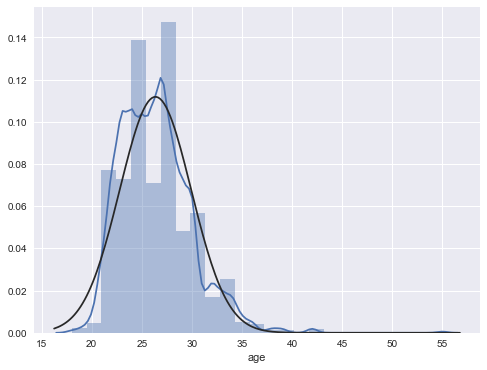

In [23]:
# age
sns.set(rc={"figure.figsize": (8,6)})

# distribution plot of age after dropping NaN
sns.distplot(df_demo.age.dropna(), hist = True, fit=norm, bins=25)

### EDA of df_attributes

In [24]:
#  Attributes - attr1_1: what you look for,  attr 2_1: what you think the oppositie sex looks for

attributes = ['wave', 'int_corr', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', \
             'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', \
              'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'match']

df_attributes = sddf[attributes].sample(n=100).sort_values('wave')
print df_attributes.head()

     wave  int_corr  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  \
0       1      0.14     15.0     20.0      20.0    15.0    15.0     15.0   
43      1      0.08     20.0      5.0      25.0    25.0    10.0     15.0   
189     1      0.49     50.0      0.0      25.0    10.0     0.0     15.0   
182     1     -0.15     50.0      0.0      25.0    10.0     0.0     15.0   
147     1     -0.23     30.0     10.0      20.0    10.0    10.0     20.0   

     attr2_1  sinc2_1  intel2_1  fun2_1  amb2_1  shar2_1  pf_o_att  pf_o_sin  \
0       35.0     20.0      15.0    20.0     5.0      5.0     35.00     20.00   
43      50.0     10.0      10.0    20.0     5.0      5.0     30.00      5.00   
189     40.0     15.0      20.0    10.0    10.0      5.0     15.00     15.00   
182     40.0     15.0      20.0    10.0    10.0      5.0     35.00     10.00   
147     20.0     20.0      20.0    20.0    10.0     10.0      9.09     18.18   

     pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  match  
0       2

In [82]:
df_attributes.describe()

,wave,int_corr,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,match
count,100.000000,98.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,10.680000,0.167143,22.700500,16.820100,20.064700,17.105100,11.134600,12.175200,29.430600,13.986200,13.962200,18.799500,11.768900,12.103200,21.834400,17.55370,19.22010,18.470100,11.472000,12.049800,0.180000
std,6.098319,0.295405,15.849108,6.409923,5.756851,6.032409,6.005326,6.408771,15.062227,7.020478,6.051137,6.864847,5.885591,6.315746,12.135446,6.15039,6.41669,7.091394,6.042578,6.053799,0.386123
min,1.000000,-0.560000,6.670000,0.000000,0.000000,0.000000,0.000000,0.000000,9.090000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.00000,0.00000,5.000000,0.000000,0.000000,0.000000
25%,5.000000,0.015000,15.000000,15.000000,18.180000,13.705000,7.250000,10.000000,20.000000,10.000000,10.000000,15.000000,10.000000,10.000000,15.067500,15.00000,15.75000,15.000000,6.845000,10.000000,0.000000
50%,11.000000,0.155000,20.000000,18.000000,20.000000,17.780000,10.000000,12.250000,25.000000,15.000000,15.000000,20.000000,10.000000,10.000000,20.000000,18.18500,20.00000,17.695000,10.555000,11.360000,0.000000
75%,15.000000,0.387500,25.000000,20.000000,23.560000,20.000000,15.000000,17.112500,35.000000,20.000000,17.835000,20.750000,15.000000,15.932500,25.000000,20.00000,20.45000,20.000000,15.337500,15.562500,0.000000
max,21.000000,0.720000,100.000000,35.000000,35.000000,35.000000,25.000000,30.000000,95.000000,30.000000,40.000000,40.000000,35.000000,30.000000,80.000000,40.00000,45.00000,50.000000,25.000000,30.000000,1.000000


### Exploring Correlations

* factor plots between match & x variables
* t-tests

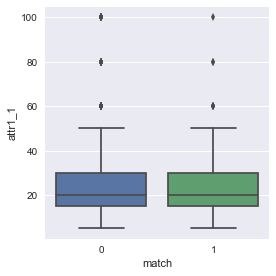

In [34]:
# factor plot of attr - attractiveness
sns.factorplot(
    x = 'match',
    y = 'attr1_1',
    data = df_nonull,
    kind = 'box')

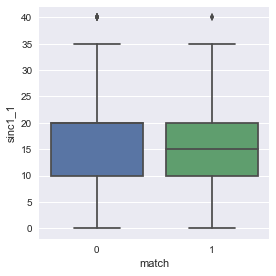

In [35]:
# factor plot of sinc - sincerity
sns.factorplot(
    x = 'match',
    y = 'sinc1_1',
    data = df_nonull,
    kind = 'box')

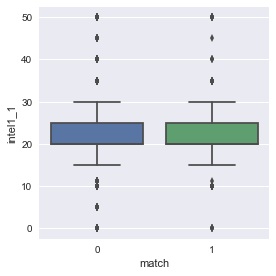

In [36]:
# factor plot of intel - intelligent
sns.factorplot(
    x = 'match',
    y = 'intel1_1',
    data = df_nonull,
    kind = 'box')

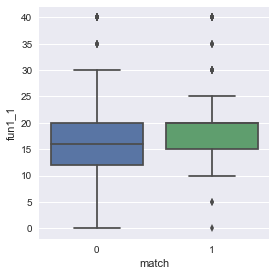

In [37]:
# factor plot of fun
sns.factorplot(
    x = 'match',
    y = 'fun1_1',
    data = df_nonull,
    kind = 'box')

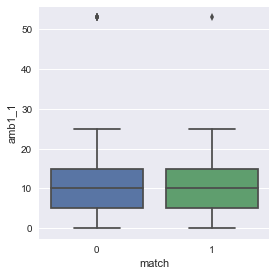

In [38]:
# factor plot of ambition
sns.factorplot(
    x = 'match',
    y = 'amb1_1',
    data = df_nonull,
    kind = 'box')

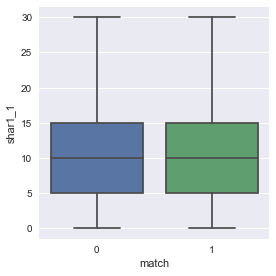

In [41]:
# factor plot of shar1_1 - shared interests
sns.factorplot(
    x = 'match',
    y = 'shar1_1',
    data = df_nonull,
    kind = 'box')

In [32]:
# variables for pairplot
attributes1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
df_attributes1 = df_nonull[attributes1]
df_attributes1.head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
30,20.0,20.0,20.0,20.0,10.0,10.0
31,20.0,20.0,20.0,20.0,10.0,10.0
32,20.0,20.0,20.0,20.0,10.0,10.0
33,20.0,20.0,20.0,20.0,10.0,10.0
34,20.0,20.0,20.0,20.0,10.0,10.0


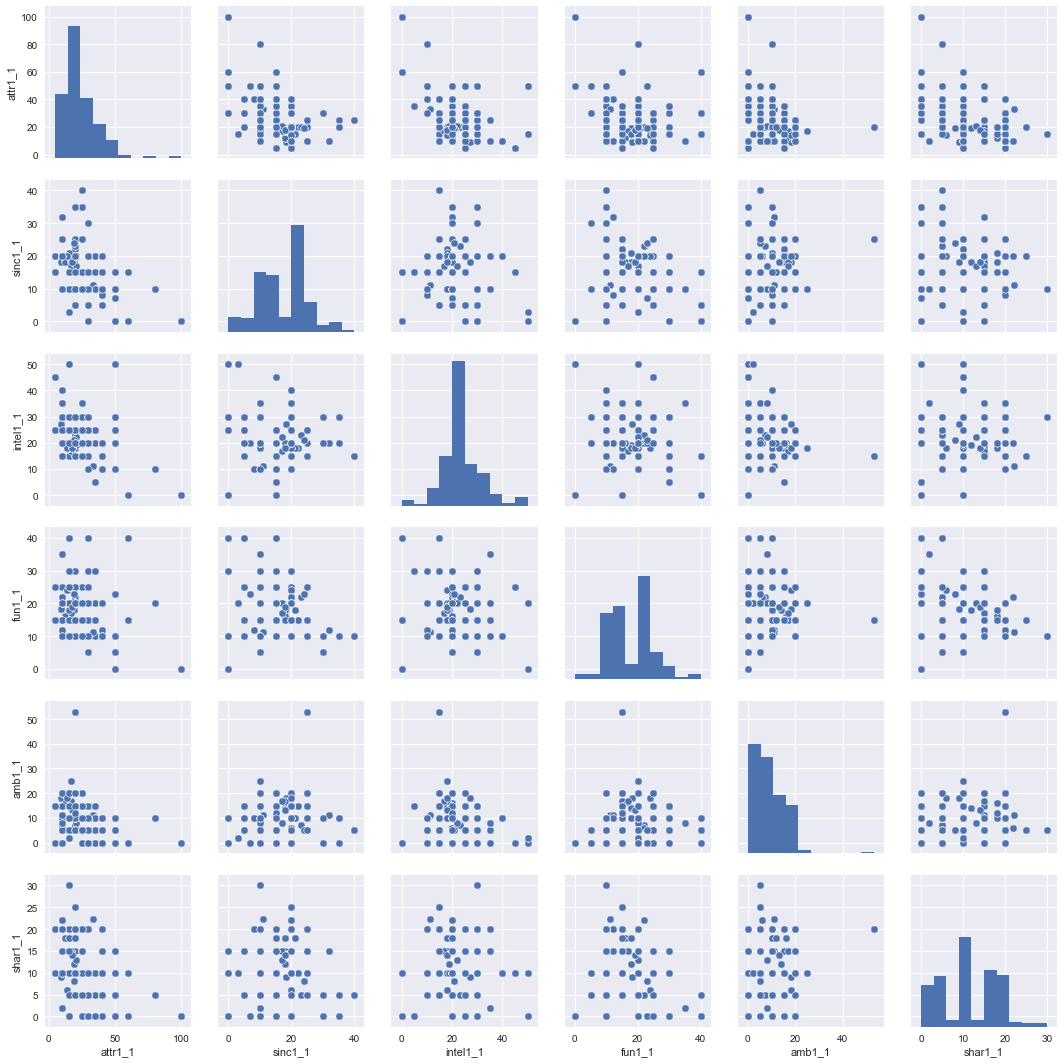

In [33]:
g= sns.pairplot(df_attributes1)

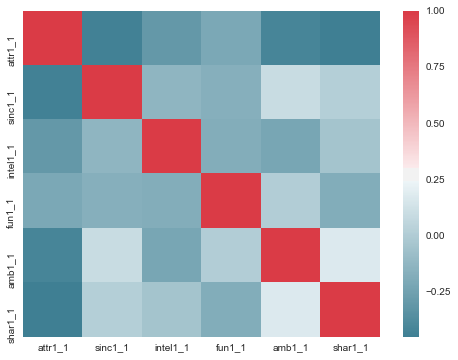

In [42]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df_nonull[attributes1].corr()
sns.heatmap(corr, cmap = cmap)

# shar1_1 and amb1_1 are negatively correlated with attractivess

In [94]:
# T-test for testing correlation between continuous and categorical # do
# Chi-square test for testing correlation between categorical and categorical # do for race + match

from scipy.stats import ttest_ind

# we want them correlated because we're testing between outcome and independent variable - p value < 0.05
# 2 sample t-test: independent samples - match = 0, match = 1

sample_attr1 = df_nonull[df_nonull.match == 0].attr1_1
sample_attr2 = df_nonull[df_nonull.match == 1].attr1_1

sample_sinc1 = df_nonull[df_nonull.match == 0].sinc1_1
sample_sinc2 = df_nonull[df_nonull.match == 1].sinc1_1

sample_intel1 = df_nonull[df_nonull.match == 0].intel1_1
sample_intel2 = df_nonull[df_nonull.match == 1].intel1_1

sample_fun1 = df_nonull[df_nonull.match == 0].fun1_1
sample_fun2 = df_nonull[df_nonull.match == 1].fun1_1

sample_amb1 = df_nonull[df_nonull.match == 0].amb1_1
sample_amb2 = df_nonull[df_nonull.match == 1].amb1_1

sample_shar1 = df_nonull[df_nonull.match == 0].shar1_1
sample_shar2 = df_nonull[df_nonull.match == 1].shar1_1


print "attractiveness: " + str(ttest_ind(sample_attr1, sample_attr2))
print "sincerity: " + str(ttest_ind(sample_sinc1, sample_sinc2))
print "intelligence: " + str(ttest_ind(sample_intel1, sample_intel2))
print "fun: " + str(ttest_ind(sample_fun1, sample_fun2))
print "ambition: " + str(ttest_ind(sample_amb1, sample_amb2))
print "shared interests: " + str(ttest_ind(sample_shar1, sample_shar2))

attractiveness: Ttest_indResult(statistic=-1.1441563284930254, pvalue=0.25259226527525797)
sincerity: Ttest_indResult(statistic=3.0007915488069878, pvalue=0.0027009024623414128)
intelligence: Ttest_indResult(statistic=-1.4364177358408079, pvalue=0.15092172374367283)
fun: Ttest_indResult(statistic=-3.9500871460673617, pvalue=7.8778430278586765e-05)
ambition: Ttest_indResult(statistic=0.35172987361475733, pvalue=0.72504990767374788)
shared interests: Ttest_indResult(statistic=4.2297924481914517, pvalue=2.3645449252868642e-05)


Based on above t-test results, we can see that following attributes are associated with match outcome variable with a p-value less than 5%.

- sincerity
- fun
- shared interests

### Simple Logistic Regression to check for confounding variables

In [43]:
# create dummy variables for categoricals - race
race_new = pd.get_dummies(df_nonull.race)
race_new.columns = ['race_' + str(i) for i in race_new.columns]
print race_new.head()

df_model_nonull = df_nonull.join(race_new)

    race_1.0  race_2.0  race_3.0  race_4.0  race_6.0
30         0         1         0         0         0
31         0         1         0         0         0
32         0         1         0         0         0
33         0         1         0         0         0
34         0         1         0         0         0


In [44]:
# create dummy variables for categoricals - gender
gender_new = pd.get_dummies(df_nonull.gender)
gender_new.columns = ['gender_' + str(i) for i in gender_new.columns]
print gender_new.head()

df_model_nonull = df_model_nonull.join(gender_new)

    gender_0  gender_1
30         1         0
31         1         0
32         1         0
33         1         0
34         1         0


In [45]:
df_model_nonull.head()

,attr1_1,sinc1_1,intel1_1,fun1_1,shar1_1,amb1_1,attr2_1,sinc2_1,intel2_1,fun2_1,shar2_1,amb2_1,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,gender,race,age,samerace,imprace,imprelig,match,int_corr,sports,tvsports,concerts,clubbing,yoga,music,exphappy,expnum,shopping,theater,reading,art,hiking,museums,dining,exercise,career_c,goal,field_cd,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,gender_0,gender_1
30,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,35.0,20.0,20.0,20.0,0.0,5.0,0,2.0,23.0,1,1.0,1.0,0,-0.18,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0,0,1,0,0,0,1,0
31,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,60.0,0.0,0.0,40.0,0.0,0.0,0,2.0,23.0,1,1.0,1.0,0,-0.18,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0,0,1,0,0,0,1,0
32,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,19.0,18.0,19.0,18.0,14.0,12.0,0,2.0,23.0,0,1.0,1.0,0,0.05,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0,0,1,0,0,0,1,0
33,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,30.0,5.0,15.0,40.0,5.0,5.0,0,2.0,23.0,1,1.0,1.0,1,-0.18,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0,0,1,0,0,0,1,0
34,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,15.0,30.0,10.0,5.0,30.0,10.0,20.0,10.0,10.0,20.0,0,2.0,23.0,0,1.0,1.0,0,0.21,1.0,1.0,8.0,7.0,8.0,7.0,1.0,2.0,1.0,9.0,7.0,7.0,7.0,6.0,7.0,6.0,1.0,1.0,1.0,0,1,0,0,0,1,0


In [46]:
# remove ambition1_1 / ambition 2_1 / race_6.0 to ensure non-colinearity
X = df_model_nonull[['gender_1', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'age', 'samerace', 'imprace', 'imprelig', \
               'int_corr', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'shar1_1', \
               'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'shar2_1', \
               'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_sha', \
               'sports', 'tvsports', 'concerts', 'clubbing', 'yoga', \
               'music', 'exphappy', 'expnum', 'shopping', \
               'theater', 'reading', 'art', 'hiking', 'museums', \
               'dining', 'exercise', 'career_c',  'goal', \
               'field_cd']]

y = df_model_nonull['match']

In [47]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
X_stats =  add_constant(X) # intercept term

lm = sm.Logit(y,X_stats) # logistic regression for statsmodels
result = lm.fit()

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.421145
         Iterations 7


In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  match   No. Observations:                 1706
Model:                          Logit   Df Residuals:                     1661
Method:                           MLE   Df Model:                           44
Date:                Fri, 27 Oct 2017   Pseudo R-squ.:                  0.1244
Time:                        17:43:40   Log-Likelihood:                -718.47
converged:                       True   LL-Null:                       -820.52
                                        LLR p-value:                 1.805e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8617      2.443     -1.990      0.047      -9.649      -0.074
gender_1       0.3997      0.289      1.383      0.167      -0.167       0.966
race_1.0      -0.4133      0.409     -1.011      0.312      -1.214       0.388
race_2.0      -0.5640      0.271     -2.080      0.038      -1.095      -0.033
race_3.0      -0.4931      0.343     -1.436      0.151      -1.166       0.180
race_4.0      -0.6498      0.322     -2.016      0.044      -1.281      -0.018
age           -0.0325      0.026     -1.231      0.218      -0.084       0.019
samerace       0.3056      0.156      1.957      0.050      -0.000       0.612
imprace       -0.1003      0.041     -2.437      0.015      -0.181      -0.020
imprelig      -0.0149      0.040     -0.373      0.709      -0.093       0.063
int_corr       0.1666      0.231      0.720      0.471      -0.287       0.620
attr1_1       -0.0102      0.017     -0.602      0.547      -0.043       0.023
sinc1_1        0.0059      0.021      0.278      0.781      -0.036       0.047
intel1_1       0.0318      0.018      1.770      0.077      -0.003       0.067
fun1_1         0.0313      0.019      1.637      0.102      -0.006       0.069
shar1_1        0.0273      0.022      1.252      0.211      -0.015       0.070
attr2_1        0.0156      0.016      1.006      0.315      -0.015       0.046
sinc2_1       -0.0337      0.022     -1.498      0.134      -0.078       0.010
intel2_1       0.0413      0.021      1.983      0.047       0.000       0.082
fun2_1        -0.0076      0.021     -0.364      0.716      -0.048       0.033
shar2_1        0.0132      0.021      0.623      0.533      -0.028       0.055
pf_o_att      -0.0007      0.012     -0.058      0.954      -0.024       0.023
pf_o_sin      -0.0007      0.016     -0.046      0.964      -0.031       0.030
pf_o_int       0.0249      0.013      1.964      0.049    5.57e-05       0.050
pf_o_fun       0.0345      0.015      2.267      0.023       0.005       0.064
pf_o_sha       0.0088      0.016      0.543      0.587      -0.023       0.040
sports        -0.0190      0.043     -0.438      0.661      -0.104       0.066
tvsports      -0.0029      0.038     -0.076      0.939      -0.078       0.072
concerts       0.0436      0.056      0.786      0.432      -0.065       0.152
clubbing       0.1920      0.043      4.472      0.000       0.108       0.276
yoga           0.0596      0.034      1.738      0.082      -0.008       0.127
music          0.1072      0.059      1.826      0.068      -0.008       0.222
exphappy       0.0006      0.057      0.010      0.992      -0.111       0.112
expnum         0.0682      0.018      3.792      0.000       0.033       0.103
shopping      -0.0552      0.044     -1.261      0.207      -0.141       0.031
theater       -0.0811      0.045     -1.792      0.073      -0.170       0.008
reading        0.0122      0.048      0.254      0.800      -0.082       0.106
art            0.1375      0.093      1.484      0.138      -0.044       0.319
hi

In [49]:
# Convert Coefficients using e^ to interpret
print np.exp(result.params)

const       0.007737
gender_1    1.491305
race_1.0    0.661466
race_2.0    0.568944
race_3.0    0.610757
race_4.0    0.522133
age         0.968030
samerace    1.357390
imprace     0.904555
imprelig    0.985208
int_corr    1.181225
attr1_1     0.989853
sinc1_1     1.005915
intel1_1    1.032318
fun1_1      1.031827
shar1_1     1.027663
attr2_1     1.015734
sinc2_1     0.966897
intel2_1    1.042162
fun2_1      0.992449
shar2_1     1.013327
pf_o_att    0.999315
pf_o_sin    0.999286
pf_o_int    1.025163
pf_o_fun    1.035102
pf_o_sha    1.008800
sports      0.981158
tvsports    0.997084
concerts    1.044607
clubbing    1.211633
yoga        1.061407
music       1.113182
exphappy    1.000566
expnum      1.070535
shopping    0.946299
theater     0.922098
reading     1.012261
art         1.147438
hiking      1.014154
museums     0.817452
dining      1.042378
exercise    0.943204
career_c    0.979381
goal        0.887788
field_cd    1.007079
dtype: float64


Logistic Regression AUC Score:0.731413009987


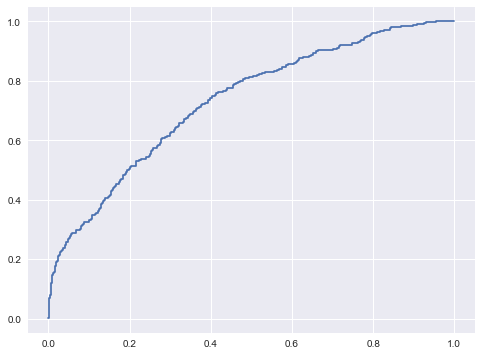

In [50]:
# plot ROC curve & print AUC score
from sklearn.metrics import roc_curve, roc_auc_score

proba = result.predict(X_stats)
plt.plot(roc_curve(df_model_nonull[['match']], proba)[0], roc_curve(df_model_nonull[['match']], proba)[1])

print "Logistic Regression AUC Score:" + str(roc_auc_score(df_model_nonull['match'], proba))


## Varible Selection

In [51]:
# Lasso (L1) 
from sklearn import linear_model

lasso = linear_model.LogisticRegression(penalty="l1", C=10)

In [52]:
lasso_result = lasso.fit(X,y)

In [53]:
# coefficients & intercept
print X.columns
print lasso_result.coef_
print lasso_result.intercept_

Index([u'gender_1', u'race_1.0', u'race_2.0', u'race_3.0', u'race_4.0', u'age',
       u'samerace', u'imprace', u'imprelig', u'int_corr', u'attr1_1',
       u'sinc1_1', u'intel1_1', u'fun1_1', u'shar1_1', u'attr2_1', u'sinc2_1',
       u'intel2_1', u'fun2_1', u'shar2_1', u'pf_o_att', u'pf_o_sin',
       u'pf_o_int', u'pf_o_fun', u'pf_o_sha', u'sports', u'tvsports',
       u'concerts', u'clubbing', u'yoga', u'music', u'exphappy', u'expnum',
       u'shopping', u'theater', u'reading', u'art', u'hiking', u'museums',
       u'dining', u'exercise', u'career_c', u'goal', u'field_cd'],
      dtype='object')
[[ 0.37602634 -0.41617045 -0.56058935 -0.46864993 -0.64243812 -0.03667929
   0.29831718 -0.10103869 -0.01541704  0.16350944 -0.01437412  0.00085113
   0.02754844  0.02613676  0.02148926  0.01215507 -0.03784091  0.03659407
  -0.01312527  0.00893963 -0.00374835 -0.00463415  0.02180949  0.03084106
   0.00519699 -0.01945115 -0.00527188  0.04500568  0.18786812  0.05883379
   0.09591093  0.00359

Lasso AUC Score:0.731326917152


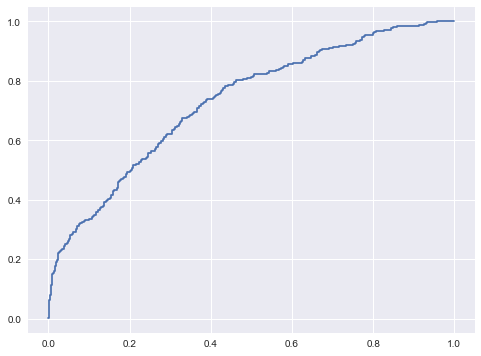

In [54]:
proba = lasso_result.predict_proba(X)
plt.plot(roc_curve(df_model_nonull[['match']], proba[:,1])[0], roc_curve(df_model_nonull[['match']], proba[:,1])[1])

print "Lasso AUC Score:" + str(roc_auc_score(df_model_nonull['match'], proba[:,1]))

### Decision Tree - extracting importance of features

In [62]:
from sklearn.tree import DecisionTreeClassifier

# control for overfitting by adjusting the max number of questions or min number of records in final node
DT_model = DecisionTreeClassifier(
                max_depth = 3,
                min_samples_leaf = 3)

DT_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(DT_model)

In [64]:
## Evalute the decision tree using cross-validation, using AUC as evaluation metric

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(DT_model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.47304969  0.50005621  0.45483925  0.47730789  0.447195  ], Average AUC 0.47048960754


### Random Forest Model - extracting importance of features

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 60)
RF_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
# extract feature importance

features = X.columns
feature_importances = RF_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
9,int_corr,0.138604
24,pf_o_sha,0.099693
21,pf_o_sin,0.087894
22,pf_o_int,0.084328
23,pf_o_fun,0.083533


In [69]:
## Evalute the Random Forest using cross-validation - 

scores = cross_val_score(RF_model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.47153215  0.33172212  0.18792154  0.19537562  0.42278379], Average AUC 0.32186704543
n trees: 1, CV AUC [ 0.48271119  0.48009291  0.40549702], Average AUC 0.456100375484
n trees: 11, CV AUC [ 0.49374465  0.33970414  0.37621498], Average AUC 0.403221258594
n trees: 21, CV AUC [ 0.4955479   0.3763397   0.40455771], Average AUC 0.425481771309
n trees: 31, CV AUC [ 0.50638779  0.32500306  0.39380667], Average AUC 0.408399170752
n trees: 41, CV AUC [ 0.52774155  0.32686744  0.43326799], Average AUC 0.429292326548
n trees: 51, CV AUC [ 0.50802804  0.32426953  0.42167974], Average AUC 0.417992434166
n trees: 61, CV AUC [ 0.51043237  0.32369901  0.41719758], Average AUC 0.417109654996
n trees: 71, CV AUC [ 0.52592811  0.3468764   0.36683207], Average AUC 0.413212194188
n trees: 81, CV AUC [ 0.51555687  0.32087697  0.42348689], Average AUC 0.419973576826
n trees: 91, CV AUC [ 0.50278129  0.34147683  0.43543249], Average AUC 0.426563537255
